In [12]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [13]:
# Download CIFAR-10 data set directly from TensorFlow
(train_data, train_labels), (test_data, test_labels) = datasets.cifar10.load_data()


In [14]:
# Reshape 2D lablel arrays to 1D and print training and test dataset shape
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

print(train_data.shape)
print(test_data.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [15]:
validation_split = 0.2  # Define the fraction of data to use for validation
num_samples = len(train_data)
num_validation_samples = int(num_samples * validation_split)

# Shuffle the indices of the training dataset
indices = tf.range(num_samples)
shuffled_indices = tf.random.shuffle(indices)

# Split the indices into training and validation indices
validation_indices = shuffled_indices[:num_validation_samples]
training_indices = shuffled_indices[num_validation_samples:]

# Create the training and validation datasets
validation_data, validation_labels = train_data[validation_indices], train_labels[validation_indices]
train_data, train_labels = train_data[training_indices], train_labels[training_indices]
train_data.shape


(40000, 32, 32, 3)

In [16]:
# Define class names
classes = ["airplane", "automobile", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck"]


In [17]:
# Normalize training and test data
train_data = train_data / 255
test_data = test_data / 255
validation_data = validation_data / 255


In [18]:
# Apply Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")
])

In [19]:
# Creating a CNN model
model = models.Sequential([
    data_augmentation,

    # CNN layers
    layers.Conv2D(filters=64, kernel_size=(3, 3),
                  activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [20]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [21]:
# Fit the model to the training dataset
history = model.fit(train_data, train_labels, epochs=10,
                    validation_data=(validation_data, validation_labels))


Epoch 1/10
 250/1250 [=====>........................] - ETA: 44s - loss: 2.1003 - accuracy: 0.2189

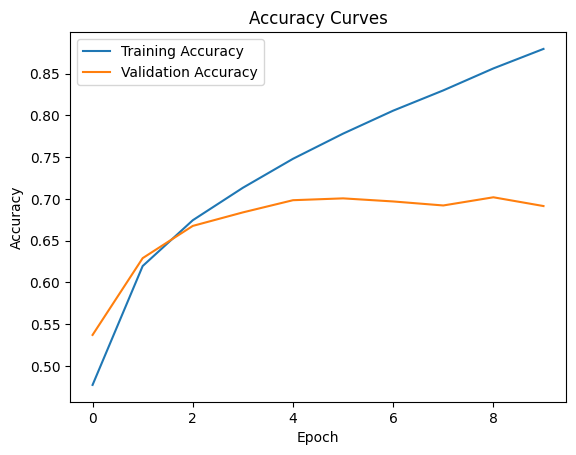

In [ ]:
# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


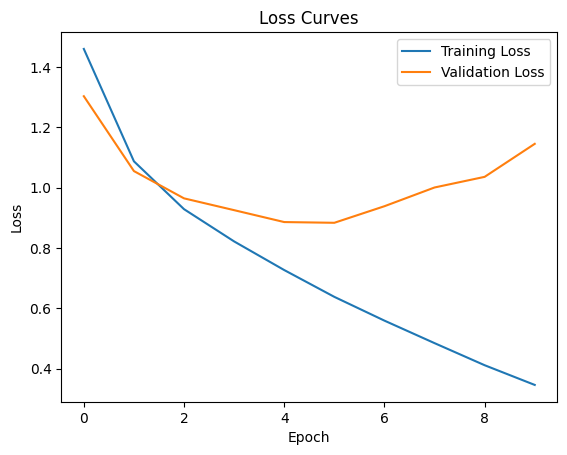

In [ ]:

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model using test dataset
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)


313/313 - 2s - loss: 1.1648 - accuracy: 0.6877 - 2s/epoch - 8ms/step


In [ ]:
# Make predictions using the test dataset
predictions = model.predict(test_data)


313/313 [==============================] - 3s 8ms/step


In [ ]:
# Find the class with the highest probability
predicted_classes = [np.argmax(element) for element in predictions]


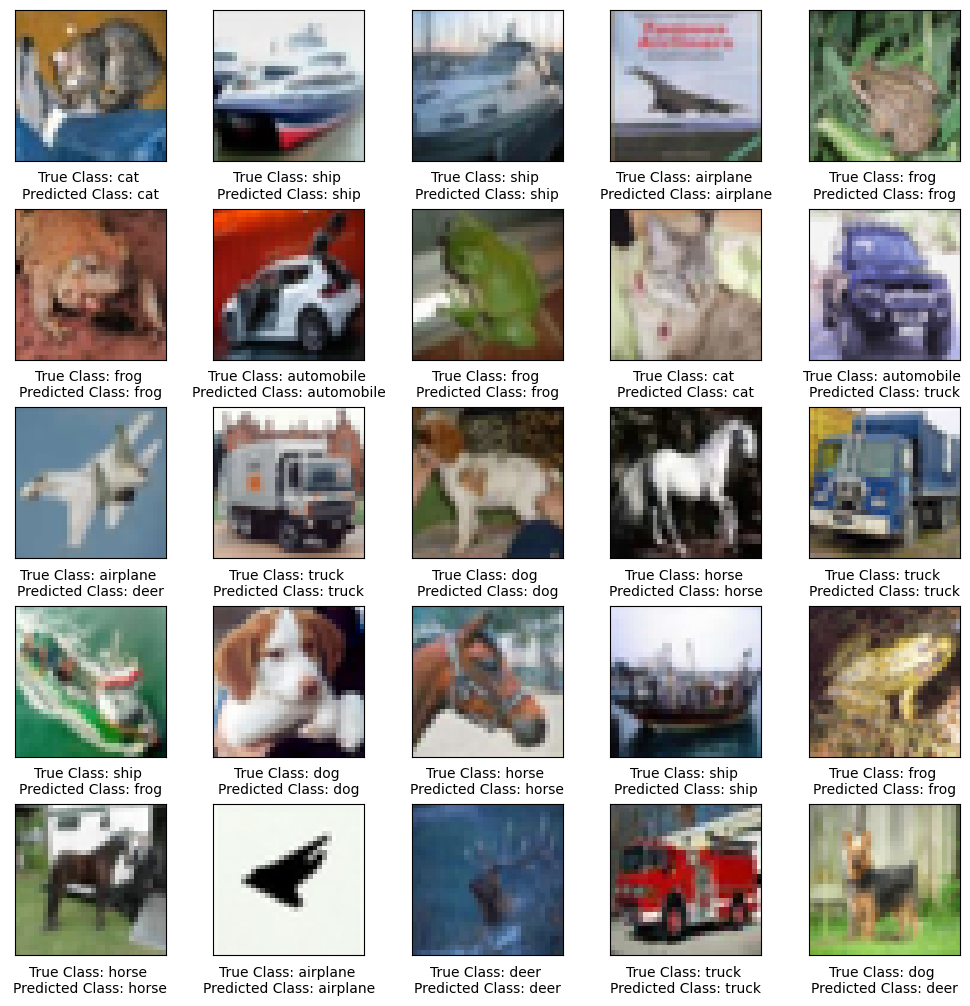

In [ ]:
# Plot the images with true classes and predicted classes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(test_data[i], cmap=plt.cm.binary)
    plt.xlabel("True Class: " + classes[test_labels[i]] +
               " \nPredicted Class: " + classes[predicted_classes[i]])

plt.tight_layout(pad=0.5)

plt.show()


In [ ]:
# Print classification report
classification_report = metrics.classification_report(
    test_labels, predicted_classes, target_names=classes)
print("Classification Report: \n", classification_report)


Classification Report: 
               precision    recall  f1-score   support

    airplane       0.78      0.68      0.73      1000
  automobile       0.82      0.77      0.80      1000
        bird       0.68      0.47      0.55      1000
         cat       0.53      0.49      0.51      1000
        deer       0.55      0.72      0.62      1000
         dog       0.57      0.66      0.61      1000
        frog       0.75      0.77      0.76      1000
       horse       0.71      0.76      0.73      1000
        ship       0.83      0.75      0.79      1000
       truck       0.73      0.80      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



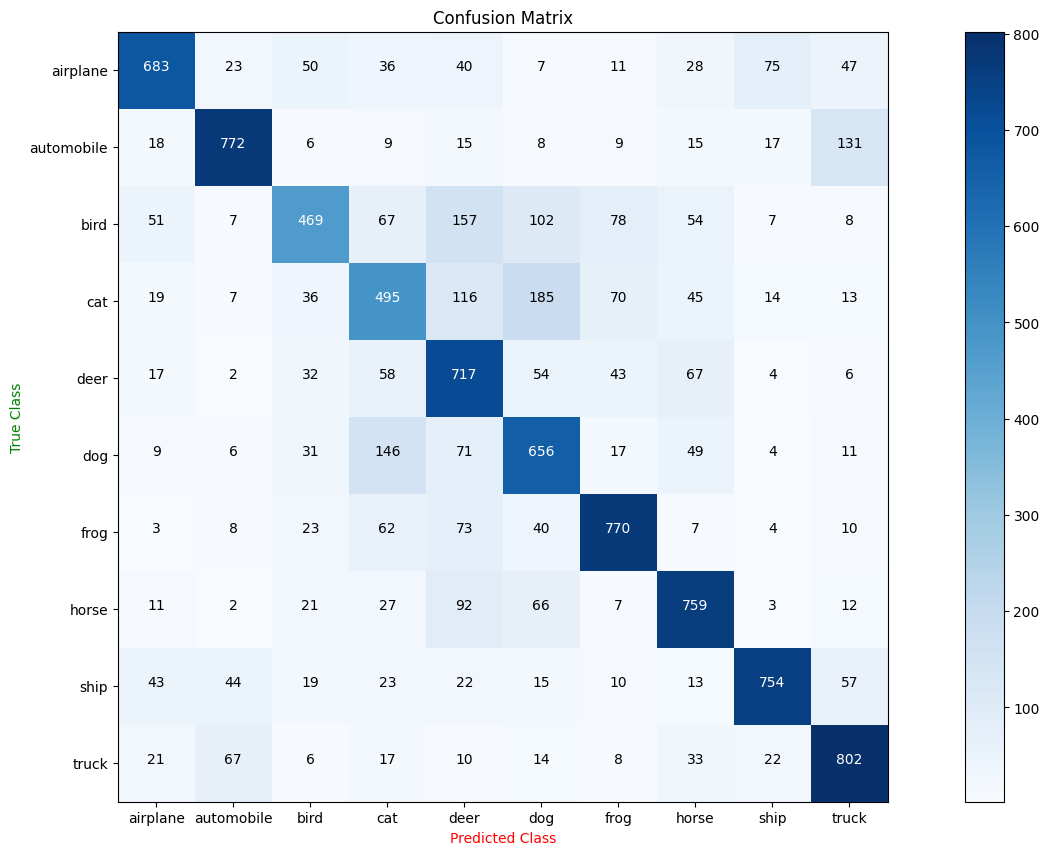

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Class', color='green')
plt.xlabel('Predicted Class', color='red')
plt.show()


In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [ ]:
# Download CIFAR-10 data set directly from TensorFlow
(train_data, train_labels), (test_data, test_labels) = datasets.cifar10.load_data()


In [ ]:
# Reshape 2D lablel arrays to 1D and print training and test dataset shape
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

print(train_data.shape)
print(test_data.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
validation_split = 0.2  # Define the fraction of data to use for validation
num_samples = len(train_data)
num_validation_samples = int(num_samples * validation_split)

# Shuffle the indices of the training dataset
indices = tf.range(num_samples)
shuffled_indices = tf.random.shuffle(indices)

# Split the indices into training and validation indices
validation_indices = shuffled_indices[:num_validation_samples]
training_indices = shuffled_indices[num_validation_samples:]

# Create the training and validation datasets
validation_data, validation_labels = train_data[validation_indices], train_labels[validation_indices]
train_data, train_labels = train_data[training_indices], train_labels[training_indices]
train_data.shape


(40000, 32, 32, 3)

In [ ]:
# Define class names
classes = ["airplane", "automobile", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck"]


In [ ]:
# Normalize training and test data
train_data = train_data / 255
test_data = test_data / 255
validation_data = validation_data / 255


In [ ]:
# Apply Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")
])

In [ ]:
# Creating a CNN model
model = models.Sequential([

    
    # CNN layers
    layers.Conv2D(filters=64, kernel_size=(3, 3),
                  activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2),),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3),
                  activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2),),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10,  activation='softmax')

])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Fit the model to the training dataset
history = model.fit(train_data, train_labels, epochs=10,
                    validation_data=(validation_data, validation_labels))


Epoch 1/10
1135/1250 [==========================>...] - ETA: 4s - loss: 1.7662 - accuracy: 0.3594

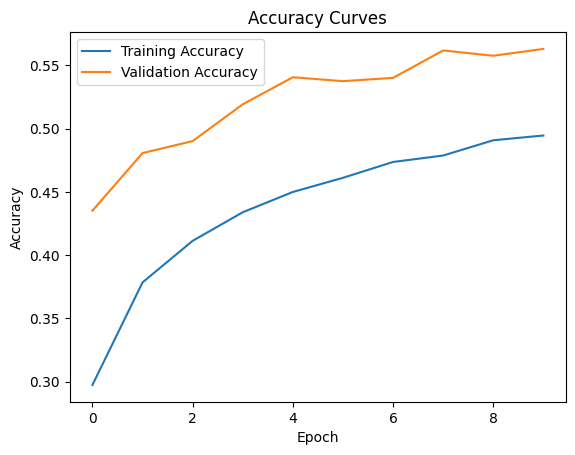

In [ ]:
# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


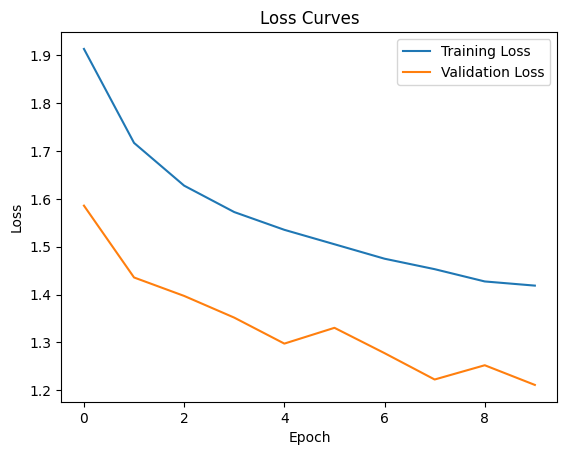

In [ ]:

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model using test dataset
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)


313/313 - 3s - loss: 1.2100 - accuracy: 0.5662 - 3s/epoch - 10ms/step


In [ ]:
# Make predictions using the test dataset
predictions = model.predict(test_data)


313/313 [==============================] - 3s 10ms/step


In [ ]:
# Find the class with the highest probability
predicted_classes = [np.argmax(element) for element in predictions]


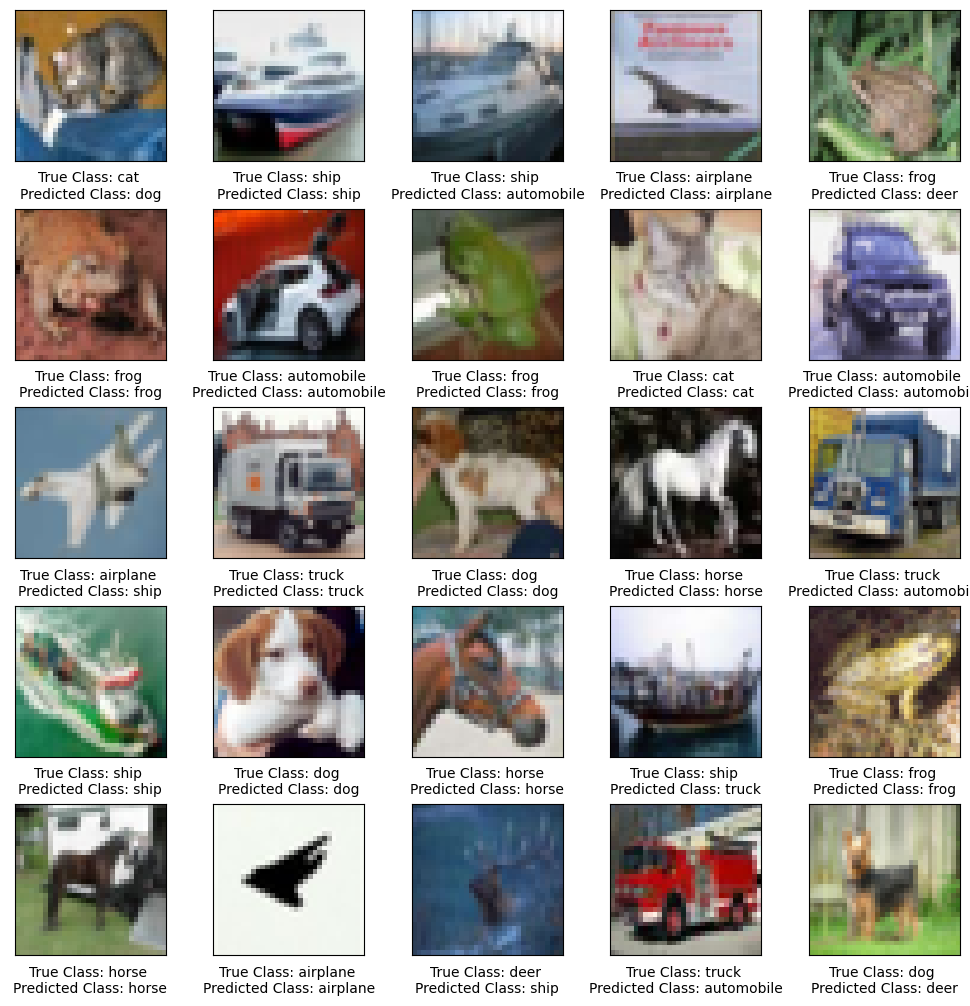

In [ ]:
# Plot the images with true classes and predicted classes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(test_data[i], cmap=plt.cm.binary)
    plt.xlabel("True Class: " + classes[test_labels[i]] +
               " \nPredicted Class: " + classes[predicted_classes[i]])

plt.tight_layout(pad=0.5)

plt.show()


In [ ]:
# Print classification report
classification_report = metrics.classification_report(
    test_labels, predicted_classes, target_names=classes)
print("Classification Report: \n", classification_report)


Classification Report: 
               precision    recall  f1-score   support

    airplane       0.63      0.63      0.63      1000
  automobile       0.56      0.79      0.66      1000
        bird       0.61      0.27      0.38      1000
         cat       0.50      0.20      0.29      1000
        deer       0.57      0.45      0.50      1000
         dog       0.50      0.50      0.50      1000
        frog       0.52      0.79      0.63      1000
       horse       0.52      0.73      0.61      1000
        ship       0.76      0.61      0.68      1000
       truck       0.56      0.69      0.62      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.55     10000
weighted avg       0.57      0.57      0.55     10000



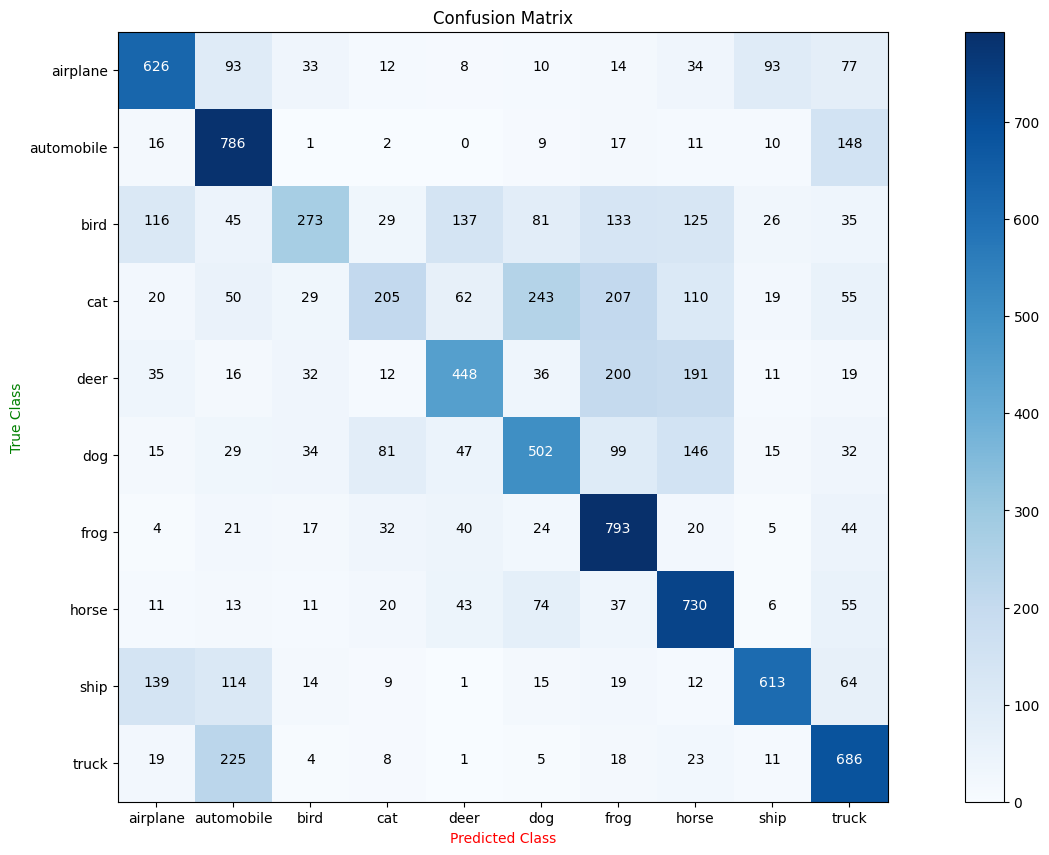

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(test_labels, predicted_classes)

plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Class', color='green')
plt.xlabel('Predicted Class', color='red')
plt.show()
